In [89]:
import pandas as pd
df = pd.read_csv('ST_train.csv')

In [90]:
Cabin_transported_df = df[['Cabin', 'Transported']].copy()
Cabin_transported_df.head()

,Cabin,Transported
0,B/0/P,False
1,F/0/S,True
2,A/0/S,False
3,A/0/S,False
4,F/1/S,True


In [91]:
Cabin_transported_df = Cabin_transported_df.dropna()

In [92]:
Cabin_transported_df[['deck', 'cab nr', 'side']] = Cabin_transported_df['Cabin'].str.split('/', expand=True)
Cabin_transported_df.head()

,Cabin,Transported,deck,cab nr,side
0,B/0/P,False,B,0,P
1,F/0/S,True,F,0,S
2,A/0/S,False,A,0,S
3,A/0/S,False,A,0,S
4,F/1/S,True,F,1,S


In [93]:
Cabin_transported_df = Cabin_transported_df.drop('Cabin', axis=1)
Cabin_transported_df.head()

,Transported,deck,cab nr,side
0,False,B,0,P
1,True,F,0,S
2,False,A,0,S
3,False,A,0,S
4,True,F,1,S


In [94]:
from sklearn.preprocessing import LabelEncoder
# Convert 'Transported' to integers
Cabin_transported_df['Transported'] = Cabin_transported_df['Transported'].astype(int)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'deck' and 'side' columns
Cabin_transported_df['deck_encoded'] = label_encoder.fit_transform(Cabin_transported_df['deck'])
Cabin_transported_df['side_encoded'] = label_encoder.fit_transform(Cabin_transported_df['side'])

# Calculate correlation matrix for the encoded and numeric columns
correlation_matrix = Cabin_transported_df[['Transported', 'cab nr', 'deck_encoded', 'side_encoded']].corr()

print(correlation_matrix)

              Transported    cab nr  deck_encoded  side_encoded
Transported      1.000000 -0.045097     -0.116462      0.103775
cab nr          -0.045097  1.000000      0.531449     -0.037996
deck_encoded    -0.116462  0.531449      1.000000     -0.034500
side_encoded     0.103775 -0.037996     -0.034500      1.000000


In [95]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
# Convert 'Transported' to integers for mutual info calculation
Cabin_transported_df['Transported'] = Cabin_transported_df['Transported'].astype(int)

# Label encode 'deck' and 'side' columns since mutual_info_classif can handle categorical features if they are labeled correctly
label_encoder = LabelEncoder()
Cabin_transported_df['deck'] = label_encoder.fit_transform(Cabin_transported_df['deck'])
Cabin_transported_df['side'] = label_encoder.fit_transform(Cabin_transported_df['side'])

# Calculate mutual information
# Note that the 'discrete_features' parameter is set to True for all features except 'cab nr'
mi_scores = mutual_info_classif(Cabin_transported_df[['deck', 'cab nr', 'side']], Cabin_transported_df['Transported'], discrete_features=[True, False, True])

# Create a Series to view the mutual information scores
mi_series = pd.Series(mi_scores, index=['deck', 'cab nr', 'side'])

print(mi_series)

deck      0.023700
cab nr    0.012662
side      0.005394
dtype: float64


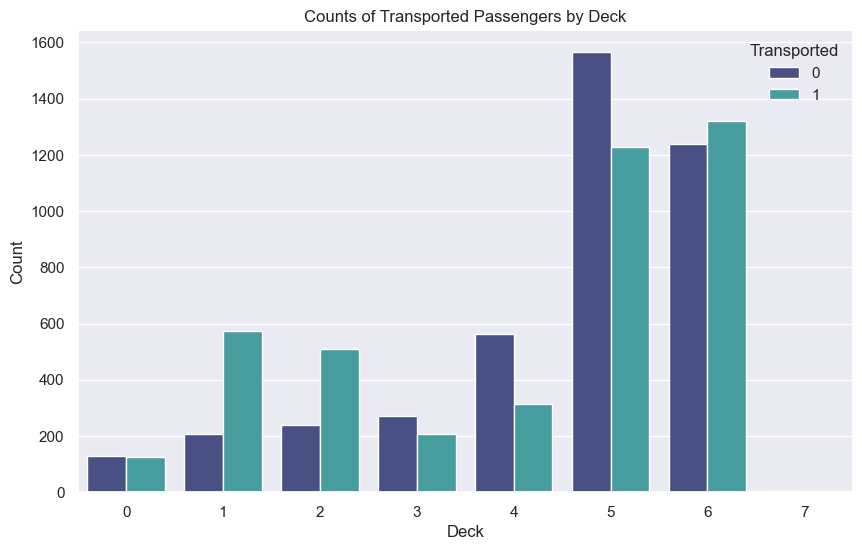

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's compute the counts of transported and not transported passengers for each deck
transported_counts = Cabin_transported_df.groupby('deck')['Transported'].value_counts().reset_index(name='count')

# Create the plot with seaborn, using the 'winter' palette
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=transported_counts, x='deck', y='count', hue='Transported', palette='mako')

plt.title('Counts of Transported Passengers by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Transported', loc='upper right')

plt.show()

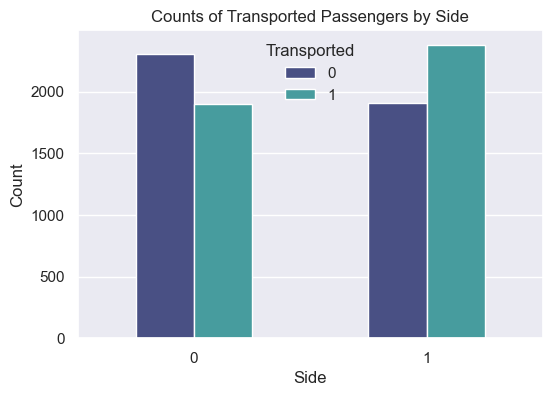

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's compute the counts of transported and not transported passengers for each deck
transported_counts = Cabin_transported_df.groupby('side')['Transported'].value_counts().reset_index(name='count')

# Create the plot with seaborn, using the 'winter' palette
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(data=transported_counts, x='side', y='count', hue='Transported', palette='mako', width=0.5)

plt.title('Counts of Transported Passengers by Side')
plt.xlabel('Side')
plt.ylabel('Count')
plt.legend(title='Transported', loc='upper center')

plt.show()

In [98]:
CabNr_df = Cabin_transported_df[['cab nr', 'Transported']].copy()
CabNr_df = CabNr_df.sort_values(by='cab nr', ascending=True)

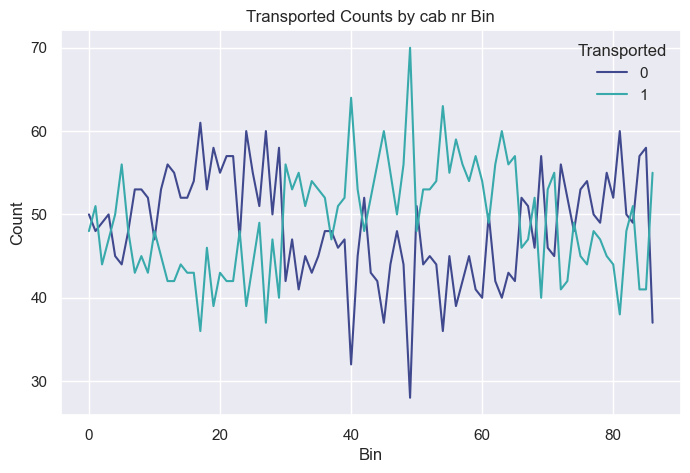

In [100]:
bin_size = 100
CabNr_df['bin'] = CabNr_df.index // bin_size

# Now group by the new 'bin' column and the 'Transported' column to get counts
transported_counts = CabNr_df.groupby(['bin', 'Transported']).size().reset_index(name='count')

# Create a bar plot with seaborn
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
sns.lineplot(data=transported_counts, x='bin', y='count', hue='Transported', palette='mako')

plt.title('Transported Counts by cab nr Bin')
plt.xlabel('Bin')
plt.ylabel('Count')

plt.show()